In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

In [2]:
size = 300
Z = np.random.normal(0, 1, size=size)
z1 = 0
X = (Z > z1)
min_Z, max_Z = min(Z), max(Z)

In [3]:
def ground_truth_X_false(Z):
    return np.sin(Z)
# E(Y | do(X=0), Z) é contínuo

def ground_truth_X_true(Z):
    return np.cos(np.pi * Z)\
# E(Y | do(X=1), Z) é contínuo

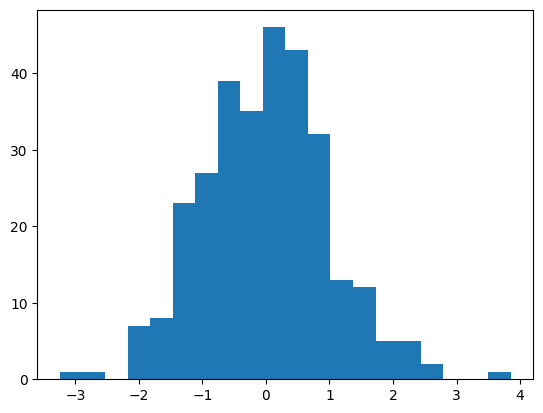

In [4]:
plt.hist(Z, bins=np.linspace(min_Z, max_Z, 21))
plt.show()

In [5]:
def generate_truth_X_Z(Z, X=None):
    if X is None:
        X = (Z > 0)
    return np.select([X, ~X], [ground_truth_X_true(Z), ground_truth_X_false(Z)])

def generate_noise():
    return np.random.normal(0, 0.3, size=size)
# mean zero

In [6]:
Y = generate_truth_X_Z(Z, X) + generate_noise()

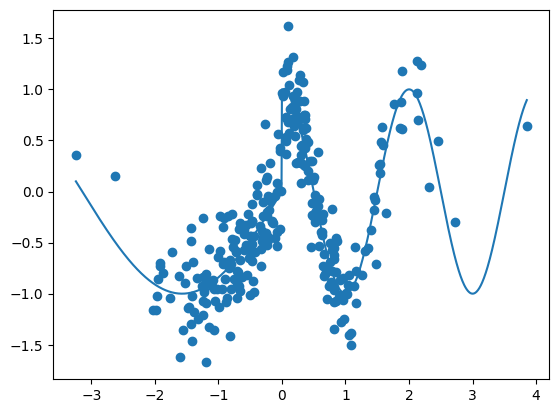

In [7]:
plt.scatter(Z, Y)
plot_x = np.linspace(min_Z, max_Z, 1001)
plt.plot(plot_x, generate_truth_X_Z(plot_x))
plt.show()

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [9]:
rfc_X_false = RandomForestRegressor(random_state=42).fit(Z[~X].reshape(-1, 1), Y[~X])
rfc_X_true = RandomForestRegressor(random_state=42).fit(Z[X].reshape(-1, 1), Y[X])

In [10]:
rfc_X_false.predict([[z1]]), rfc_X_true.predict([[z1]])

(array([-0.01081696]), array([0.97620659]))

In [11]:
lr_X_false = LinearRegression().fit(Z[~X].reshape(-1, 1), Y[~X])
lr_X_true = LinearRegression().fit(Z[X].reshape(-1, 1), Y[X])

In [12]:
lr_X_false.predict([[z1]]), lr_X_true.predict([[z1]])

(array([-0.2867233]), array([0.25224573]))

___